# Importation des librairies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from sklearn.preprocessing import Normalizer, StandardScaler

In [2]:
pd.set_option("display.max_rows", 130)
pd.set_option('max_colwidth', 250)

# Importation des données

In [3]:
data = pd.read_csv("data/application_train.csv")

In [4]:
#target = data.pop("TARGET") 
X_data = data.copy()

# Analyse des valeurs manquantes

In [5]:
#target.isna().sum()

In [6]:
#target.value_counts(normalize=True)

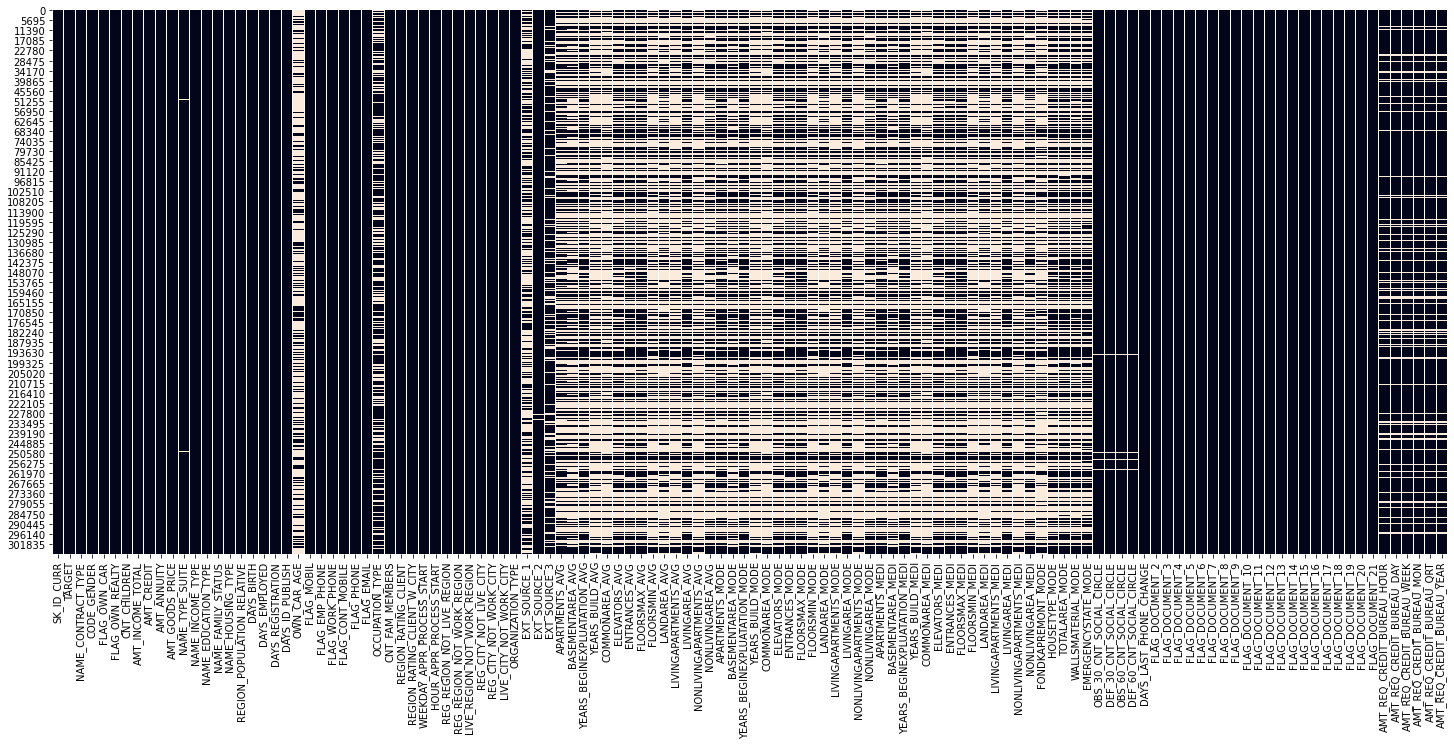

In [7]:
plt.figure(figsize=(25,10))
sns.heatmap(X_data.isna(), cbar=False)
plt.show()

In [8]:
miss_data_rate = round(X_data.isna().sum() / X_data.shape[0],3).sort_values(ascending=False)

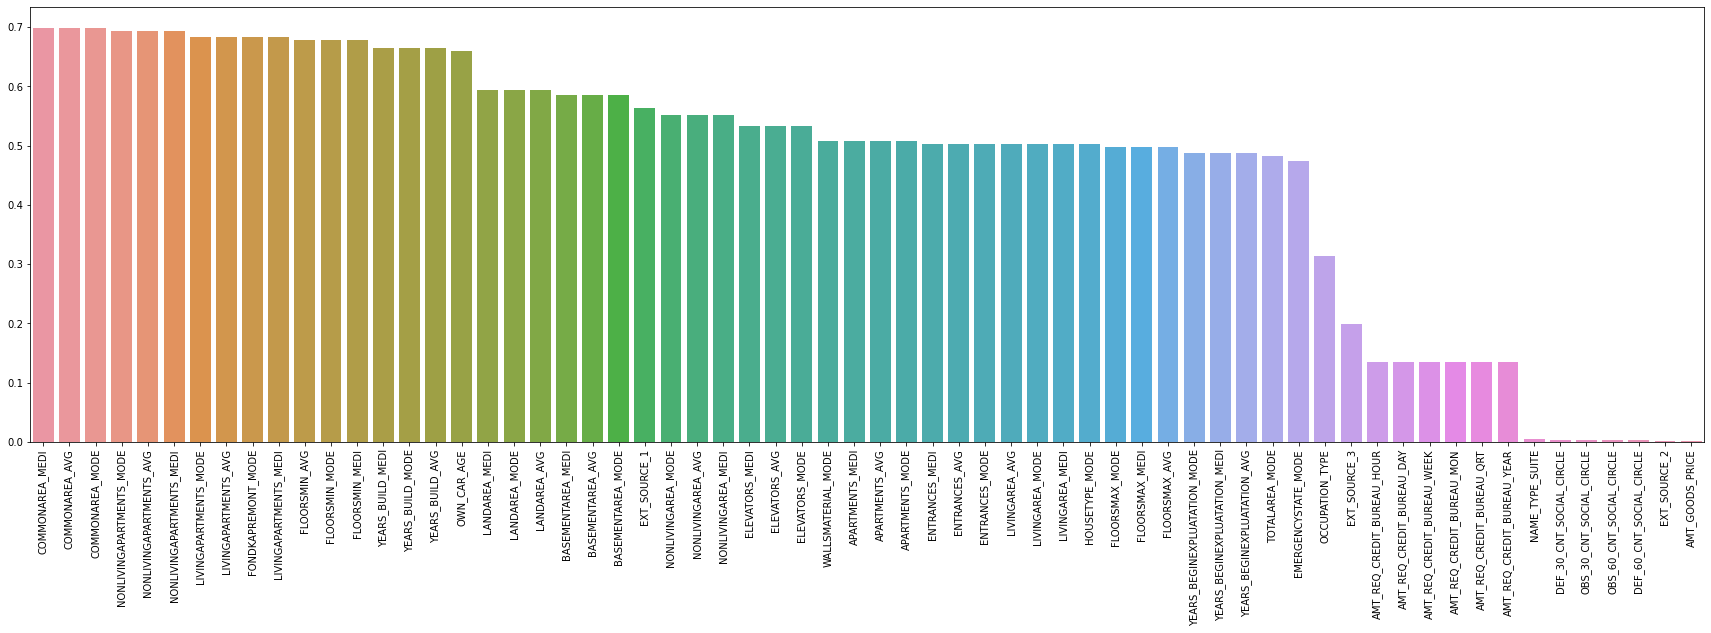

In [9]:
plt.figure(figsize=(30,8))
sns.barplot(x=miss_data_rate[miss_data_rate > 0].index, y=miss_data_rate[miss_data_rate > 0].values)
plt.xticks(rotation=90)
plt.show()

## Suppression des colonnes avec plus de 40% de valeurs manquantes

In [10]:
rate = 0.4

In [11]:
X_data = X_data[miss_data_rate[miss_data_rate < rate].index]

In [12]:
# pourcentage des valeurs manquantes total
X_data.isna().sum().sum() / X_data.size

0.018388873314833642

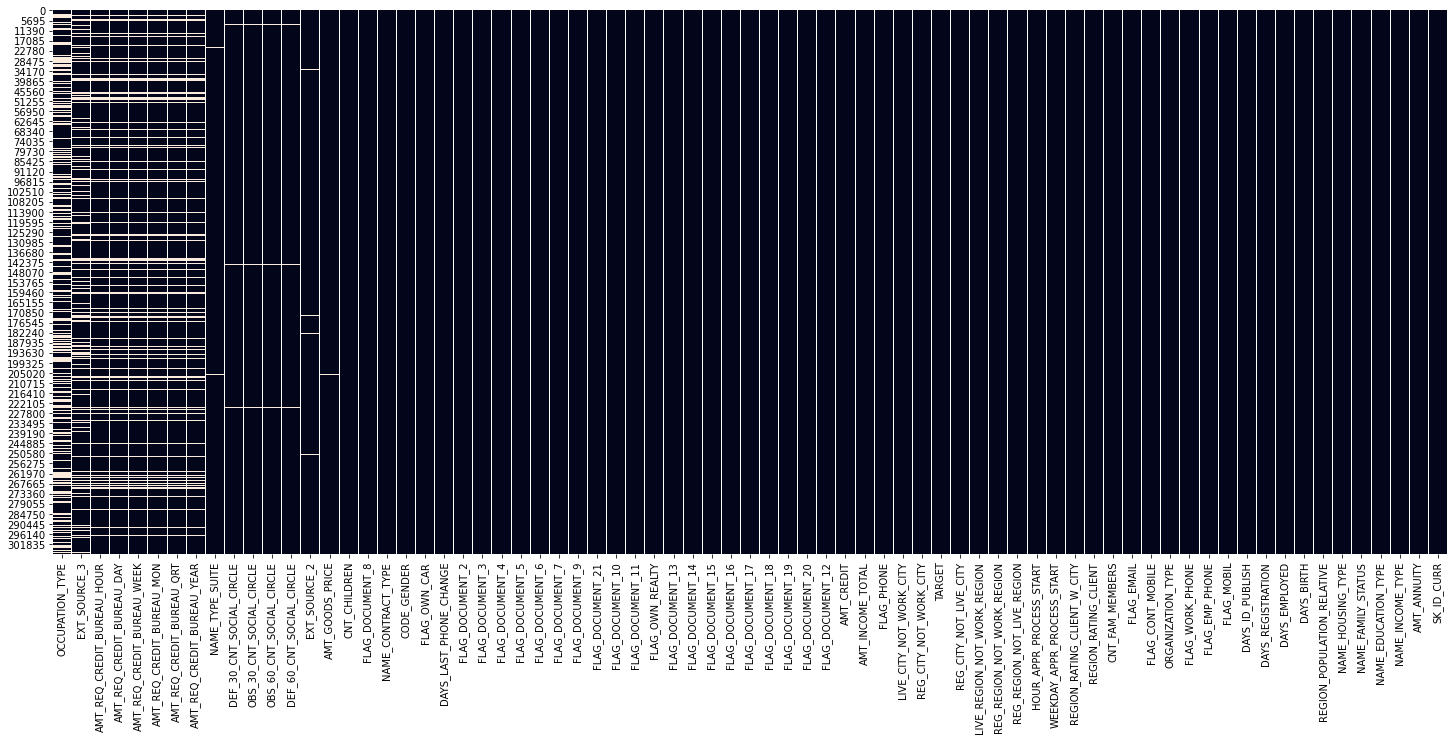

In [13]:
plt.figure(figsize=(25,10))
sns.heatmap(X_data.isna(), cbar=False)
plt.show()

## Suppression des Flag doc

In [14]:
flag_docs_col = [f"FLAG_DOCUMENT_{i}" for i in range(2,22)]

In [15]:
X_data.drop(flag_docs_col, axis=1, inplace=True)

In [16]:
X_data["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [17]:
X_data["AMT_REQ_CREDIT_BUREAU_WEEK"].isna().sum()

41519

In [18]:
amt_req_bur = X_data.columns[X_data.columns.str.contains("AMT_REQ_CREDIT_BUREAU")]

In [19]:
X_data[amt_req_bur].T.isna().all().sum()

41519

<AxesSubplot:>

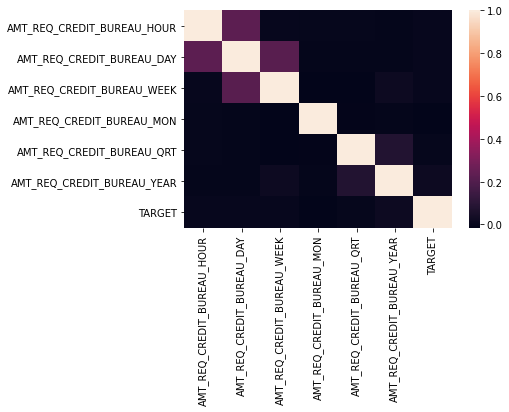

In [21]:
sns.heatmap(pd.concat([X_data[amt_req_bur], X_data.TARGET], axis=1).corr())

In [22]:
num_col = X_data.select_dtypes(np.number).columns

In [23]:
(X_data["EXT_SOURCE_3"].dropna().to_numpy()).reshape((246546,1))

array([[0.13937578],
       [0.72956669],
       [0.62122634],
       ...,
       [0.21885908],
       [0.66102354],
       [0.1139224 ]])

In [24]:
std_df = pd.DataFrame(StandardScaler().fit_transform(X_data[num_col]), columns=num_col)

In [25]:
std_df.describe()

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,AMT_ANNUITY,SK_ID_CURR
count,2.465460e+05,2.659920e+05,2.659920e+05,2.659920e+05,2.659920e+05,2.659920e+05,2.659920e+05,3.064900e+05,3.064900e+05,3.064900e+05,...,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.074990e+05,3.075110e+05
mean,-8.598755e-16,-1.605826e-15,7.883288e-15,1.121138e-14,1.825531e-15,-2.952771e-15,3.974764e-15,1.260669e-15,-4.989284e-16,1.918629e-17,...,-9.642254e-16,-3.102083e-15,2.917601e-14,7.987038e-17,-5.944310e-18,-2.784011e-16,3.710928e-17,1.936947e-16,-1.777085e-17,-4.019342e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.619150e+00,-7.635691e-02,-6.320321e-02,-1.678776e-01,-2.919160e-01,-3.343275e-01,-1.016414e+00,-3.210687e-01,-5.923592e-01,-5.905087e-01,...,-4.990131e-01,-2.133575e+00,-5.545358e+02,-2.784328e+00,-5.588007e+00,-5.784940e-01,-2.106335e+00,-1.487798e+00,-1.758906e+00,-1.733423e+00
25%,-7.195669e-01,-7.635691e-02,-6.320321e-02,-1.678776e-01,-2.919160e-01,-3.343275e-01,-1.016414e+00,-3.210687e-01,-5.923592e-01,-5.905087e-01,...,-4.990131e-01,4.686969e-01,1.803310e-03,-8.644204e-01,-7.077673e-01,-4.712426e-01,-8.352476e-01,-7.853308e-01,-7.302872e-01,-8.661836e-01
50%,1.253482e-01,-7.635691e-02,-6.320321e-02,-1.678776e-01,-2.919160e-01,-3.343275e-01,-4.814522e-01,-3.210687e-01,-5.923592e-01,-5.905087e-01,...,-4.990131e-01,4.686969e-01,1.803310e-03,-1.721143e-01,1.368540e-01,-4.602923e-01,6.576450e-02,-1.459095e-01,-1.521745e-01,2.089836e-04
75%,8.119512e-01,-7.635691e-02,-6.320321e-02,-1.678776e-01,-2.919160e-01,-3.343275e-01,5.884719e-01,-3.210687e-01,2.406323e-01,2.498983e-01,...,-4.990131e-01,4.686969e-01,1.803310e-03,8.441512e-01,8.447974e-01,-4.537519e-01,8.304332e-01,5.635704e-01,5.165982e-01,8.654730e-01
max,1.976744e+00,4.762846e+01,8.119562e+01,3.891667e+01,2.918404e+01,3.283586e+02,1.235764e+01,7.579305e+01,1.443482e+02,1.439595e+02,...,2.003956e+00,4.686969e-01,1.803310e-03,1.983641e+00,1.415353e+00,2.133617e+00,1.958761e+00,3.733564e+00,1.593221e+01,1.732410e+00


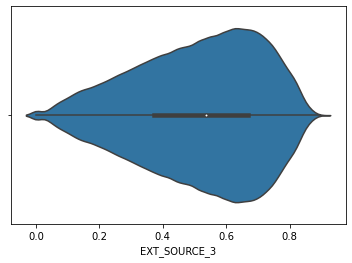

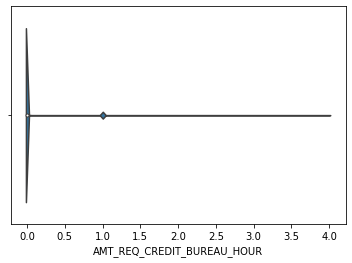

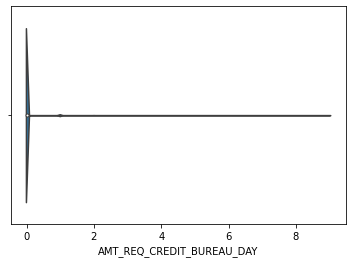

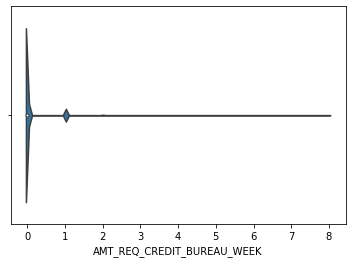

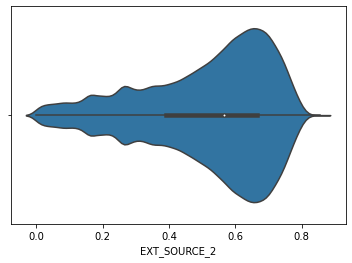

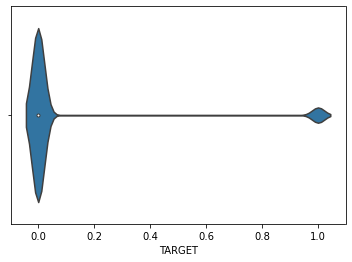

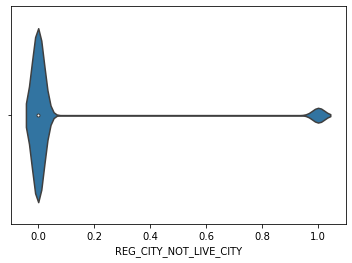

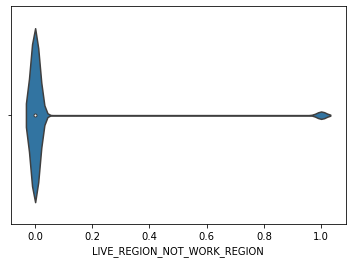

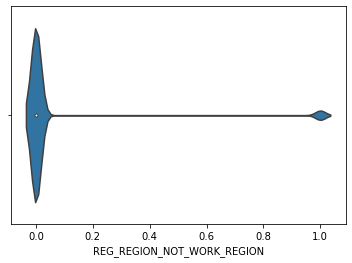

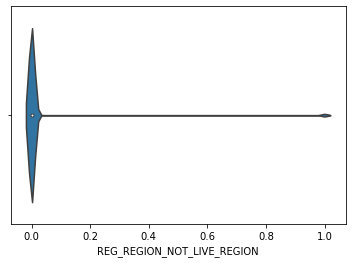

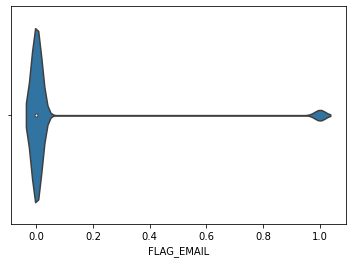

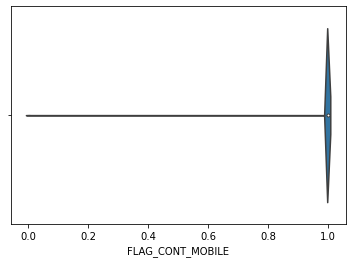

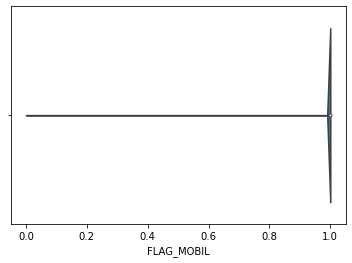

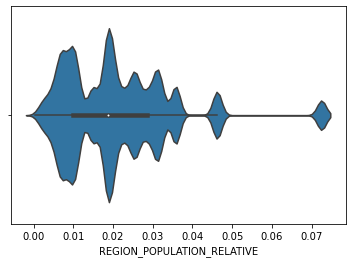

In [26]:
col_under_var = []
for col in X_data[X_data[num_col].columns[X_data[num_col].var() < 0.1]]:
    sns.violinplot(x=X_data[col])
    col_under_var.append(col)
    plt.show()

### Suppression des colonnes avec moins de 0.1 de variance à l'exception de REGION_POPULATION_RELATIVE et EXT_SOURCE_2 et EXT_SOURCE_3

In [27]:
col_to_drop_var = ['AMT_REQ_CREDIT_BUREAU_WEEK',
                   'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY',
                   'REG_CITY_NOT_LIVE_CITY',
                   'LIVE_REGION_NOT_WORK_REGION',
                   'REG_REGION_NOT_WORK_REGION',
                   'REG_REGION_NOT_LIVE_REGION',
                   'FLAG_EMAIL',
                   'FLAG_CONT_MOBILE',
                   'FLAG_MOBIL']

X_data.drop(col_to_drop_var, axis=1, inplace= True)

In [28]:
cat_col = X_data.select_dtypes("object").columns

In [29]:
for col in X_data[cat_col]:
    print(col)
    print(X_data[col].unique(), "\n")

OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff'] 

NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people'] 

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans'] 

CODE_GENDER
['M' 'F' 'XNA'] 

FLAG_OWN_CAR
['N' 'Y'] 

FLAG_OWN_REALTY
['Y' 'N'] 

WEEKDAY_APPR_PROCESS_START
['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY'] 

ORGANIZATION_TYPE
['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: 

### changer les valeurs "XNA" en np.nan

In [30]:
X_data.replace(["XNA", "Unknown"], np.nan, inplace=True)

In [31]:
for col in X_data[cat_col]:
    print(col)
    print(X_data[col].value_counts(dropna=False), "\n")

OCCUPATION_TYPE
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64 

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE

In [ ]:
X_data.columns

### Suppression des NaN dans les colonnes GENDER et NAME_FAMILY_STATUE

In [32]:
X_data.dropna(subset=["CODE_GENDER", "NAME_FAMILY_STATUS"], inplace=True)

### Regrouper ORGANIZATION_TYPE

In [33]:
def func_drop_type(t):
    if "Type" in str(t):
        return t[:-7]
    elif "type" in str(t):
        return t.split(":")[0]
    else:
        return t

In [34]:
X_data["ORGANIZATION_TYPE"] = X_data.ORGANIZATION_TYPE.apply(func_drop_type)

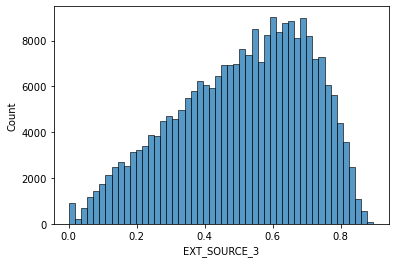

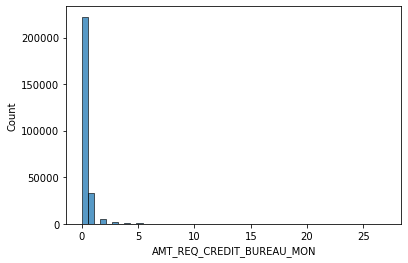

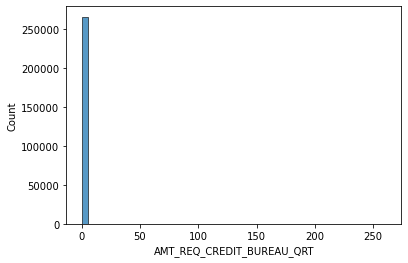

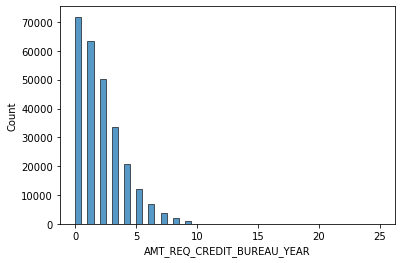

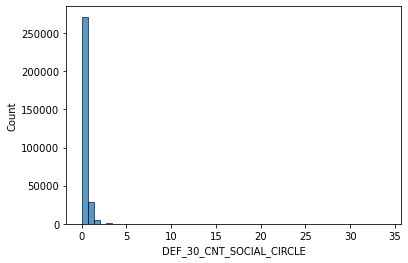

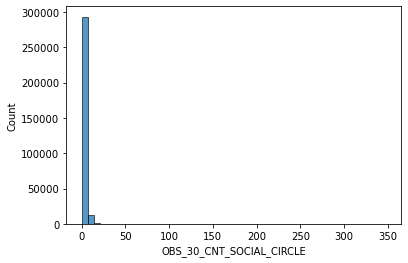

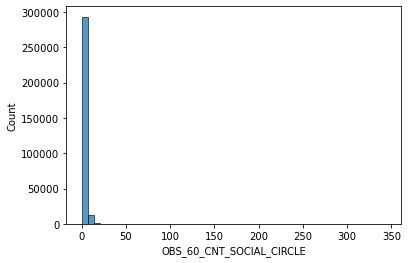

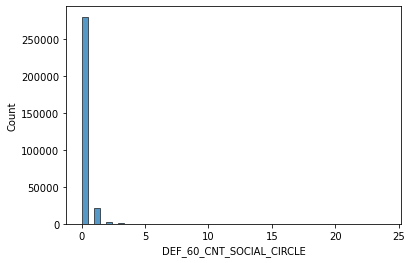

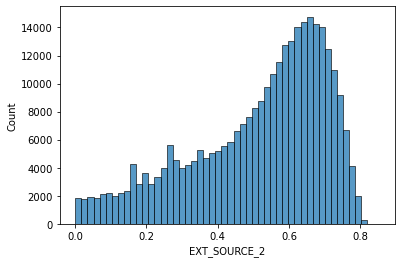

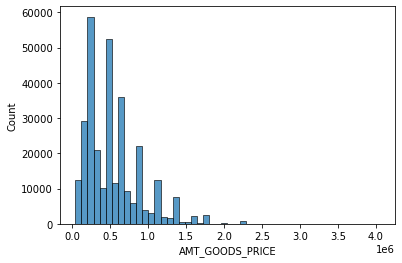

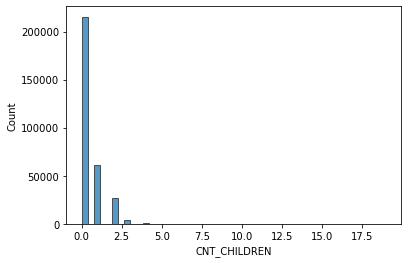

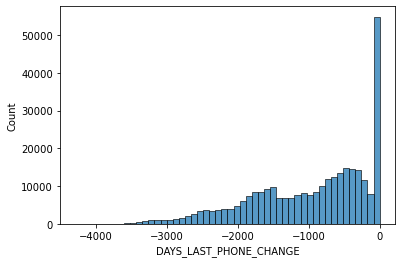

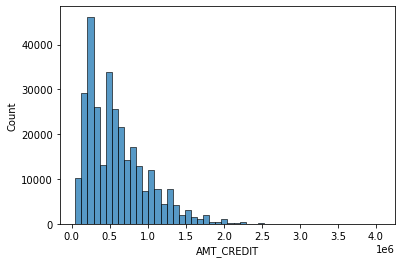

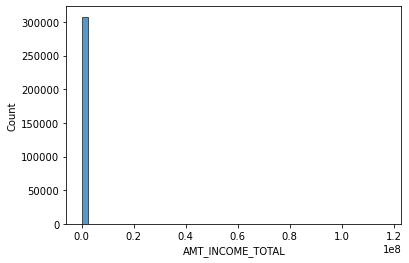

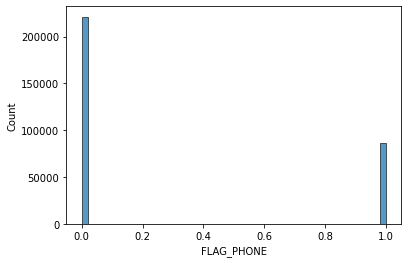

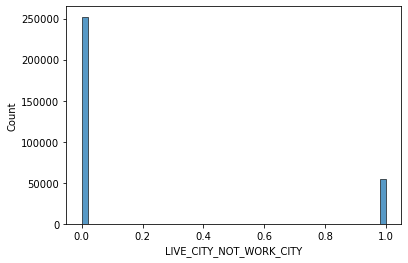

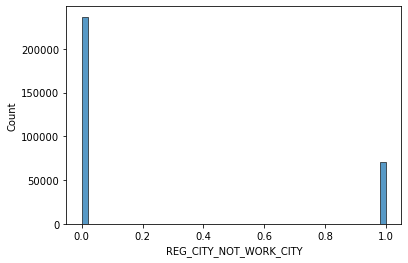

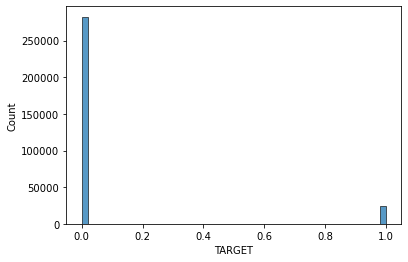

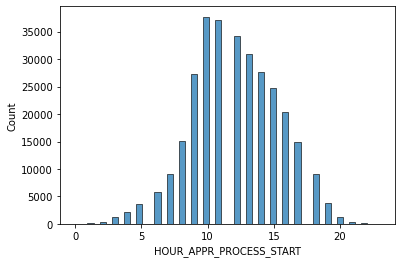

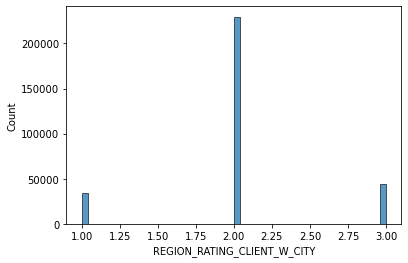

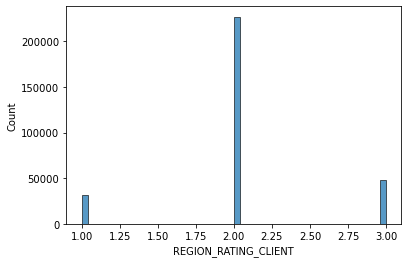

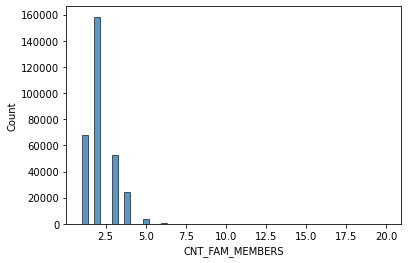

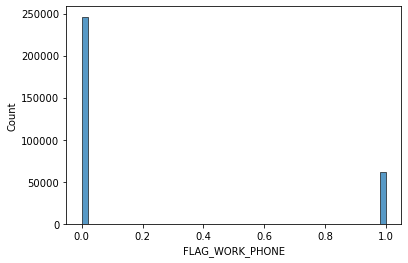

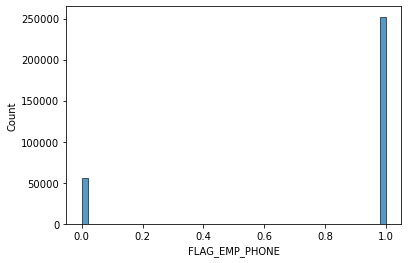

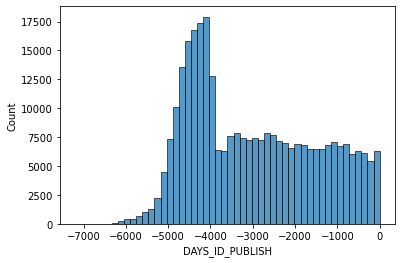

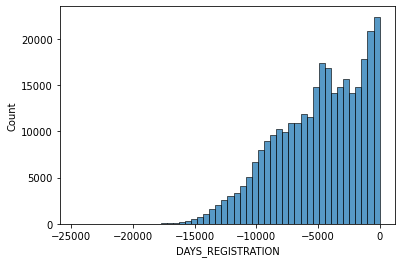

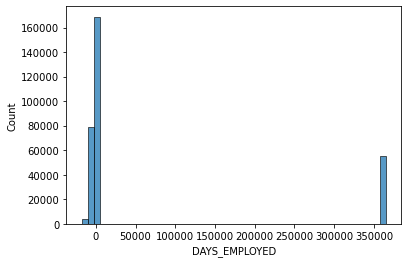

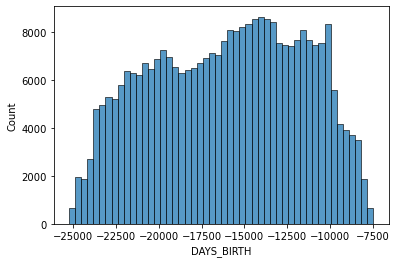

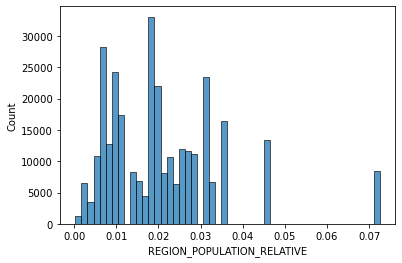

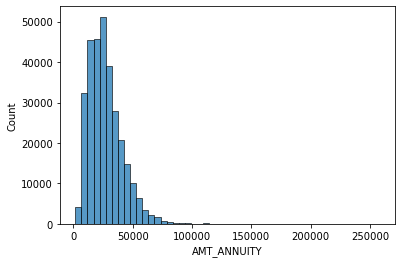

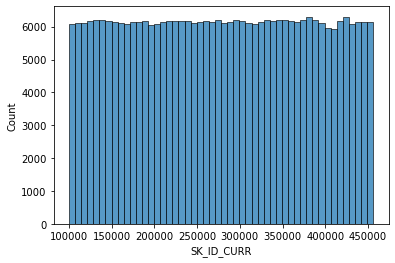

In [35]:
for col in X_data.select_dtypes(np.number):
    sns.histplot(x=X_data[col],bins=50)
    plt.show()

In [36]:
X_data.loc[(X_data.DAYS_EMPLOYED > 20000)]["DAYS_EMPLOYED"]

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

In [37]:
X_data.loc[(X_data.DAYS_EMPLOYED > 20000)]["OCCUPATION_TYPE"].value_counts(dropna=False,normalize=True)

NaN               0.999964
Cleaning staff    0.000036
Name: OCCUPATION_TYPE, dtype: float64

In [38]:
X_data.CODE_GENDER.value_counts(normalize=True)

F    0.658354
M    0.341646
Name: CODE_GENDER, dtype: float64

In [39]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307505 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   OCCUPATION_TYPE              211116 non-null  object 
 1   EXT_SOURCE_3                 246541 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_MON    265987 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_QRT    265987 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_YEAR   265987 non-null  float64
 5   NAME_TYPE_SUITE              306215 non-null  object 
 6   DEF_30_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 7   OBS_30_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 8   OBS_60_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 9   DEF_60_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 10  EXT_SOURCE_2                 306845 non-null  float64
 11  AMT_GOODS_PRICE              307229 non-null  float64
 12  CNT_CHILDREN                 307505 non-null  int64  
 13 

### Supression des valeurs extremes

Suppression les individus avec des valeurs extremes dans la colonnes DAYS_EMPLOYED, ce qui va supprimer aussi une grandes partie des valeurs manquantes notemen dazns les colonnes ORGANIZATION_TYPE, OCCUPATION_TYPE

In [ ]:
# X_data = X_data.loc[(X_data.DAYS_EMPLOYED < 30000)]

<AxesSubplot:>

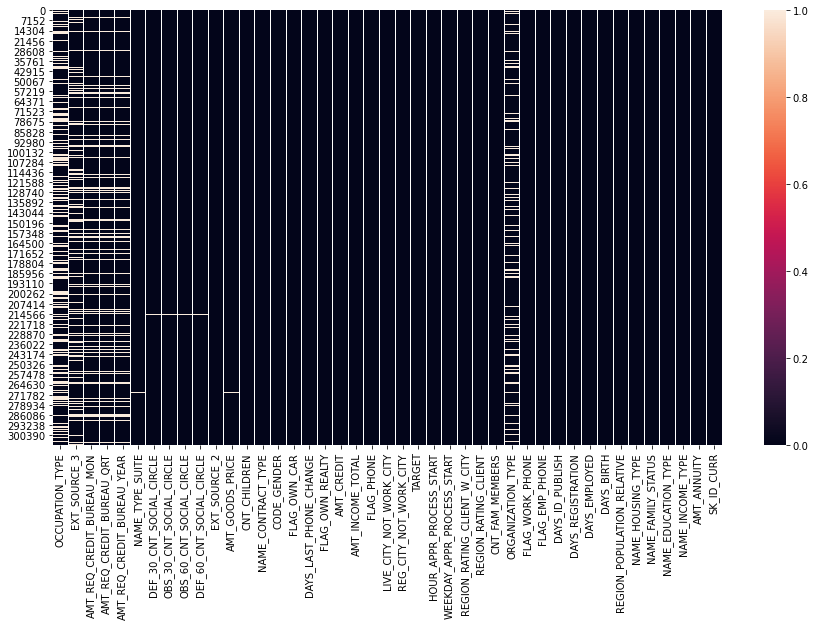

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.isna())

In [41]:
X_data.isna().sum()

OCCUPATION_TYPE                96389
EXT_SOURCE_3                   60964
AMT_REQ_CREDIT_BUREAU_MON      41518
AMT_REQ_CREDIT_BUREAU_QRT      41518
AMT_REQ_CREDIT_BUREAU_YEAR     41518
NAME_TYPE_SUITE                 1290
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  276
CNT_CHILDREN                       0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
DAYS_LAST_PHONE_CHANGE             1
FLAG_OWN_REALTY                    0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
FLAG_PHONE                         0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
TARGET                             0
HOUR_APPR_PROCESS_START            0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
R

In [42]:
X_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1290
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [43]:
X_data.NAME_FAMILY_STATUS.value_counts(dropna=False)

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

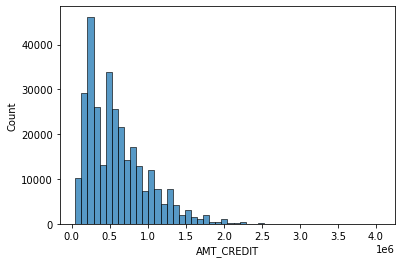

In [44]:
sns.histplot(X_data.AMT_CREDIT,bins=50)

In [45]:
X_data[["AMT_CREDIT","AMT_GOODS_PRICE"]].corr()

,AMT_CREDIT,AMT_GOODS_PRICE
AMT_CREDIT,1.000000,0.986971
AMT_GOODS_PRICE,0.986971,1.000000


In [46]:
col_to_drop = ["AMT_GOODS_PRICE", 
               "DEF_60_CNT_SOCIAL_CIRCLE", 
               "OBS_60_CNT_SOCIAL_CIRCLE", 
               "OBS_30_CNT_SOCIAL_CIRCLE", 
               "DEF_30_CNT_SOCIAL_CIRCLE",
               "AMT_REQ_CREDIT_BUREAU_YEAR",
               "AMT_REQ_CREDIT_BUREAU_QRT",
               "AMT_REQ_CREDIT_BUREAU_MON",
               "LIVE_CITY_NOT_WORK_CITY",
               "REGION_RATING_CLIENT_W_CITY",
               "CNT_FAM_MEMBERS"
              ]

In [47]:
X_data.drop(col_to_drop, axis=1, inplace=True)

<AxesSubplot:>

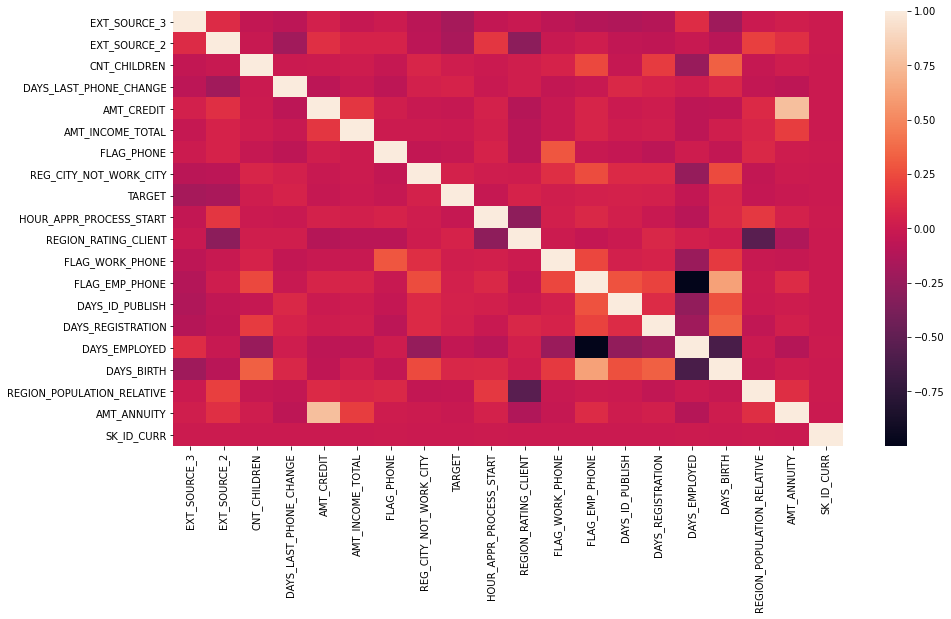

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.corr())

<AxesSubplot:>

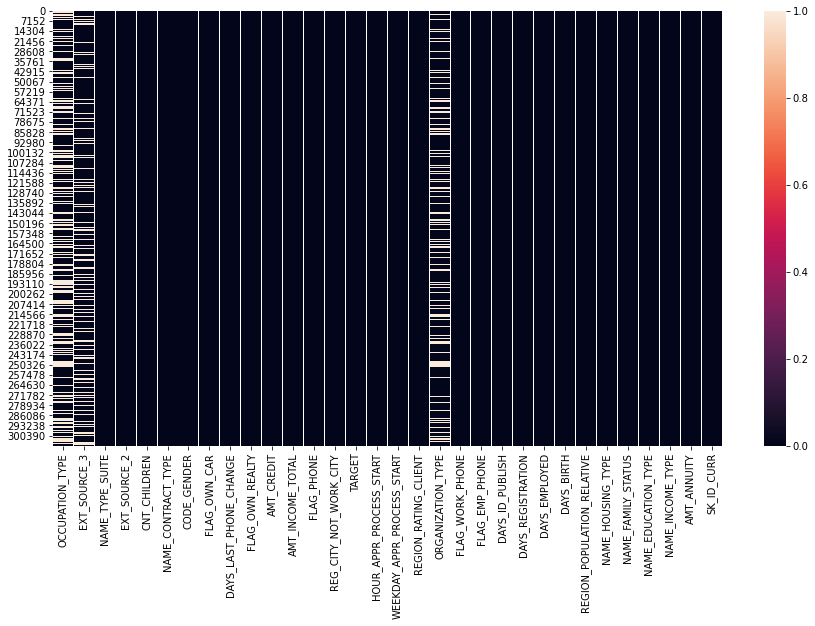

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.isna())

### Colonne NAME_TYPE_SUITE

In [50]:
X_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1290
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [51]:
X_data.NAME_TYPE_SUITE = X_data.NAME_TYPE_SUITE.replace(["Other_B", "Other_A", np.nan], value="Other")

In [52]:
X_data.isna().sum()

OCCUPATION_TYPE               96389
EXT_SOURCE_3                  60964
NAME_TYPE_SUITE                   0
EXT_SOURCE_2                    660
CNT_CHILDREN                      0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
DAYS_LAST_PHONE_CHANGE            1
FLAG_OWN_REALTY                   0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
FLAG_PHONE                        0
REG_CITY_NOT_WORK_CITY            0
TARGET                            0
HOUR_APPR_PROCESS_START           0
WEEKDAY_APPR_PROCESS_START        0
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE             55374
FLAG_WORK_PHONE                   0
FLAG_EMP_PHONE                    0
DAYS_ID_PUBLISH                   0
DAYS_REGISTRATION                 0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
REGION_POPULATION_RELATIVE        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS          

<AxesSubplot:>

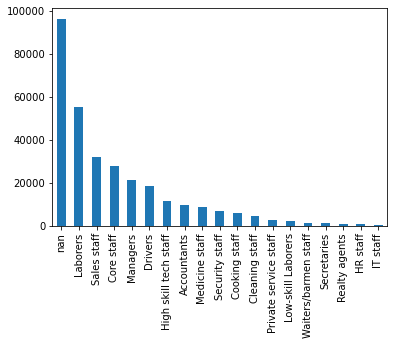

In [53]:
X_data.OCCUPATION_TYPE.value_counts(dropna=False).plot.bar()

In [54]:
def fill_NaNs_in_occupation_type(row):
    if pd.isnull(row['OCCUPATION_TYPE']):
        organization_type = row['ORGANIZATION_TYPE']
        return X_data[X_data['ORGANIZATION_TYPE']==organization_type].OCCUPATION_TYPE.value_counts().first_valid_index()
    else:
        return row['OCCUPATION_TYPE']

In [55]:
tqdm.pandas()

In [56]:
occupation_filled_nan = X_data.progress_apply(lambda row: fill_NaNs_in_occupation_type(row), axis=1)

100%|██████████| 307505/307505 [19:25<00:00, 263.81it/s]


<AxesSubplot:>

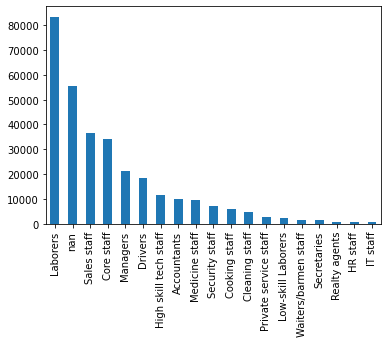

In [57]:
occupation_filled_nan.value_counts(dropna=False).plot.bar()

In [58]:
X_data.OCCUPATION_TYPE = occupation_filled_nan

In [59]:
ext_source_col = ["EXT_SOURCE_2", "EXT_SOURCE_3"]

In [60]:
X_data[ext_source_col] = X_data[ext_source_col].fillna(X_data[ext_source_col].median())

<AxesSubplot:>

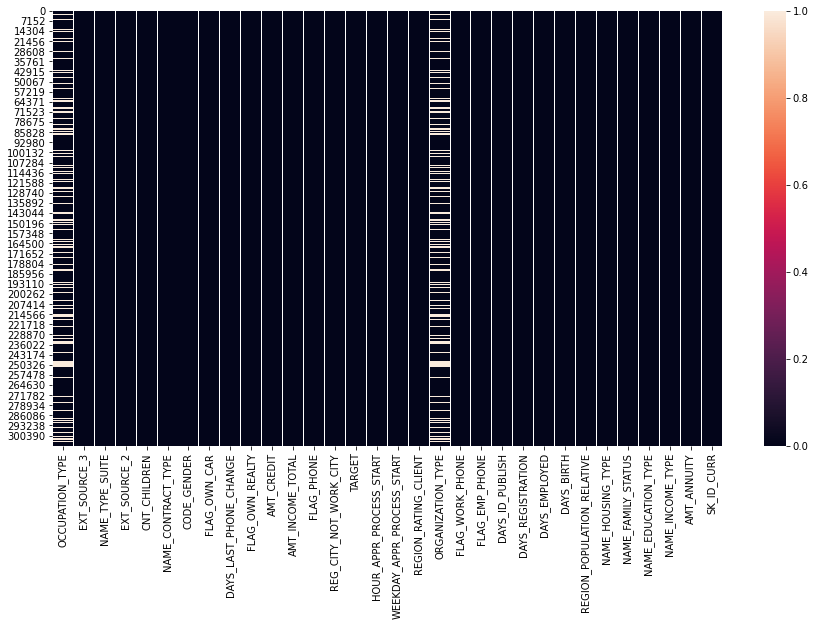

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.isna())

In [62]:
X_data.dropna(inplace=True)

In [ ]:
#target = target.loc[X_data.index]

In [ ]:
#X_data.to_csv("X_data.csv")
#target.to_csv("target.csv")

In [63]:
X_data['PROPORTION_LIFE_EMPLOYED'] = X_data['DAYS_EMPLOYED'] / X_data['DAYS_BIRTH']
X_data['INCOME_TO_CREDIT_RATIO'] = X_data['AMT_INCOME_TOTAL'] / X_data['AMT_CREDIT'] 
X_data['INCOME_TO_ANNUITY_RATIO'] = X_data['AMT_INCOME_TOTAL'] / X_data['AMT_ANNUITY']

In [65]:
X_data.to_csv("data.csv")

In [64]:
X_data.head()

,OCCUPATION_TYPE,EXT_SOURCE_3,NAME_TYPE_SUITE,EXT_SOURCE_2,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,DAYS_LAST_PHONE_CHANGE,FLAG_OWN_REALTY,...,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,AMT_ANNUITY,SK_ID_CURR,PROPORTION_LIFE_EMPLOYED,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO
0,Laborers,0.139376,Unaccompanied,0.262949,0,Cash loans,M,N,-1134.0,Y,...,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,24700.5,100002,0.067329,0.498036,8.198215
1,Core staff,0.535276,Family,0.622246,0,Cash loans,F,N,-828.0,N,...,0.003541,House / apartment,Married,Higher education,State servant,35698.5,100003,0.070862,0.208736,7.563343
2,Laborers,0.729567,Unaccompanied,0.555912,0,Revolving loans,M,Y,-815.0,Y,...,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,6750.0,100004,0.011814,0.500000,10.000000
3,Laborers,0.535276,Unaccompanied,0.650442,0,Cash loans,F,N,-617.0,Y,...,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,29686.5,100006,0.159905,0.431748,4.547522
4,Core staff,0.535276,Unaccompanied,0.322738,0,Cash loans,M,N,-1106.0,Y,...,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,21865.5,100007,0.152418,0.236842,5.556699
